In [1]:
%load_ext memory_profiler
import numpy as np
import os
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

import h5py
from scipy import integrate
import pandas as pd
import random
from scipy.signal import find_peaks
import qetpy as qp
# import sys
# sys.path.append("./")
from functions import *

In [2]:
matplotlib.rc('font', size=16)          # controls default text sizes
matplotlib.rc('axes', titlesize=16)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=16)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=16)    # legend fontsize
matplotlib.rc('figure', titlesize=16)  # fontsize of the figure title
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rc('figure.subplot', hspace=  0.4)
fs = 1/2e-9

templateEM_Tl,  TemplateEM_Tl = create_template(np.load(r'templates/Tl_template_pulses.npy'))
templateHAD_Tl,  TemplateHAD_Tl = create_template(np.load(r'templates/Tl_template_pulses_neutron.npy'))

templateEM_p,  TemplateEM_p = create_template(np.load(r'templates/pure_template_pulses.npy'))
templateHAD_p,  TemplateHAD_p = create_template(np.load(r'templates/pure_template_pulses_neutron.npy'))

fs =1/2e-9



# def OF_calct0(signal, template_norm, psd_noise, fs, recordlength):
#     amp, t0, chi2= [], [], []
#     for trace in np.arange(len(signal)):
#         OF = qp.OptimumFilter(signal[trace], template_norm, psd_noise, fs) # initialize the OptimumFilter class
#         amp_withdelay, t0_withdelay, chi2_withdelay= OF.ofamp_withdelay() # t0_withdelay : time shift calculated for the pulse (in s).
#         amp.append(amp_withdelay)
#         t0.append(t0_withdelay)
#         chi2.append(chi2_withdelay)
#     return amp, t0, chi2


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# %%memit
# file = 'saved_outputs/pure_XFEL_beamON.hdf5'
# pure = sort()
# amp_EM_preselected = pure.func(File = file, key = 'amp_withdelay_EM', ctype = 'pure', level = 'preselected')
# deltachi2_preselected = pure.func(File = file, key = 'Delta_chi2', ctype = 'pure', level = 'preselected')


In [19]:
indir_hdf = 'saved_outputs/'
for fl in os.listdir(indir_hdf):
    if fl.startswith('wavedump_Tl_run12_21-04-30_14-59-09_'):
        print(fl)
        ctype = 'Tl'
        with h5py.File(indir_hdf+fl, 'a') as file:

            deltachi2 = file['Delta_chi2'][:]
            chi2_EM = file['chi2_withdelay_EM'][:]
            amppil_EM = file['amp_pileup_EM'][:]
            t0pil_EM = file['t0_pileup_EM'][:]
            chi2pil_EM = file['chi2_pileup_EM'][:]
            chi2_Had = file['chi2_withdelay_Had'][:]
            amppil_Had = file['amp_pileup_Had'][:]
            t0pil_Had = file['t0_pileup_Had'][:]
            chi2pil_Had = file['chi2_pileup_Had'][:]
            deltachi2 = file ['Delta_chi2'][:]

            if ctype == 'Tl' :            
                select2 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and  (abs(amppil_EM[i] )>1000 and abs(t0pil_EM[i]*fs )>100 ) or (abs(amppil_EM[i] )>200 and abs(t0pil_EM[i]*fs )>1800 )]
                select3 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (abs(amppil_Had[i] )>700 and abs(t0pil_Had[i]*fs )>700 ) or (abs(amppil_Had[i] )>200 and abs(t0pil_Had[i]*fs )>1800 )]
                select6 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and abs(amppil_EM[i] )>20 and t0pil_EM[i]*fs <0]
                select7 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and abs(amppil_Had[i] )>20 and t0pil_Had[i]*fs <0]
                select8 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and (chi2pil_EM[i] > 3.5e7 or chi2_EM[i]/15000>3000) ]
                select9 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (chi2pil_Had[i] > 3.5e7 or chi2_Had[i]/15000>3000) ]
                select_FTonly = list(set( select2+select3+ select6+select7+select8+select9))

            if ctype == 'pure':
                select2 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and  (abs(amppil_EM[i]) > 150 and  abs(t0pil_EM[i]*fs) > 180)]
                select3 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (abs(amppil_Had[i] ) > 150 and abs(t0pil_Had[i]*fs) > 180)]
                select6 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and (abs(amppil_EM[i] )>30 and t0pil_EM[i]*fs <-20) or (abs(amppil_EM[i] )>50 and t0pil_EM[i]*fs <-10)]
                select7 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (abs(amppil_Had[i] )>30 and t0pil_Had[i]*fs <-20) or (abs(amppil_Had[i] )>50 and t0pil_Had[i]*fs <-10)]
                select_FTonly = list(set(select3+select2+ select6+select7))


            pileup_excess = [True if i in select_FTonly else e for i, e in enumerate([False]*len(deltachi2))]
            print(len(pileup_excess), len(deltachi2))
            print((select_FTonly))
            if 'pileup_excess' in file.keys(): 
                del file['pileup_excess']
                file.create_dataset('pileup_excess', data = pileup_excess, maxshape=(None,))
            else: file.create_dataset('pileup_excess', data = pileup_excess, maxshape=(None,))

        file.close()            

wavedump_Tl_run12_21-04-30_14-59-09_1.hdf5
29202 29202
[13824, 22016, 2562, 1029, 3590, 25605, 11787, 22031, 14864, 1042, 9235, 13844, 21013, 16406, 17430, 19477, 17433, 27674, 19995, 23580, 24084, 8228, 43, 22572, 18477, 4651, 28716, 16434, 17971, 21045, 1591, 15421, 16446, 24126, 3652, 15947, 8267, 5709, 7758, 8783, 100, 24679, 20588, 23666, 28274, 9844, 8311, 19063, 8316, 2174, 22148, 3720, 13962, 23693, 24205, 4239, 2705, 1686, 663, 8344, 13469, 16037, 20647, 7339, 8367, 28337, 6835, 23732, 2236, 5310, 7360, 21696, 5832, 4809, 28874, 205, 17101, 24789, 21720, 6363, 227, 17636, 23269, 742, 7399, 22758, 19175, 24810, 27378, 10482, 9975, 1273, 18684, 1276, 5895, 22281, 7445, 5409, 25896, 18220, 7981, 12080, 20787, 22332, 1344, 7488, 6978, 16706, 6980, 9031, 842, 9546, 10572, 6477, 26955, 10060, 25936, 6482, 13651, 28501, 347, 10076, 13662, 13152, 25453, 3957, 29046, 6521, 10110, 27007, 20350, 24448, 898, 6021, 14727, 26504, 17289, 9610, 909, 18318, 14227, 12692, 27539, 15763, 15256, 1

In [9]:
%%time
file = 'saved_outputs/Tl_cosmics.hdf5'
Tl =variables()
Tl.var(File = file, ctype = 'Tl', examine = True)

CPU times: user 4.27 s, sys: 275 ms, total: 4.55 s
Wall time: 4.72 s


In [17]:
print('all', 6522407)
print(len(Tl.select) )
print(len(Tl.select_FT) )
print(len(Tl.amp_EM_PS_FT) )

all 6522407
910868
1379013
5143394


In [14]:
print('allall', 6522407)
print(len(Tl.select) )
print(len(Tl.select_FT) )
print(len(Tl.amp_EM_PS_FT) )

allall 6522407
910868
1460923
5061484


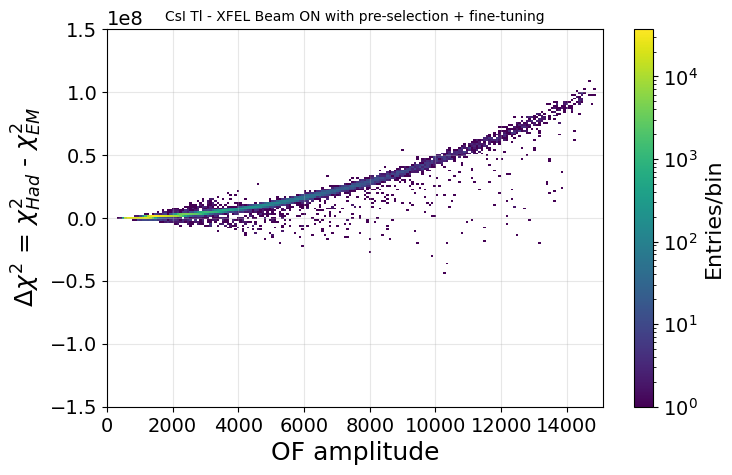

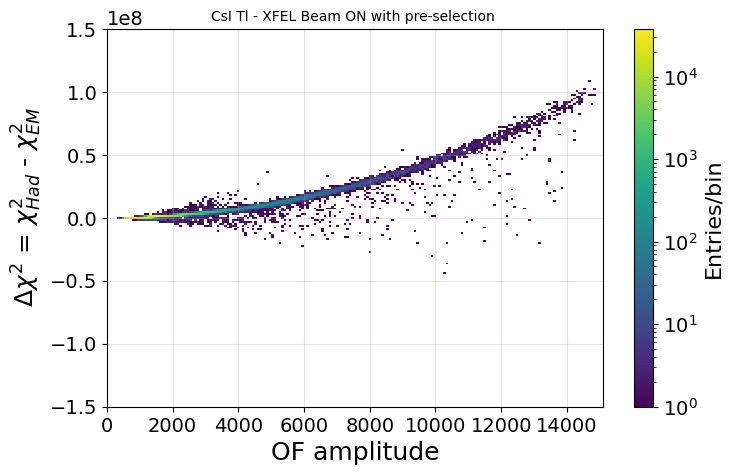

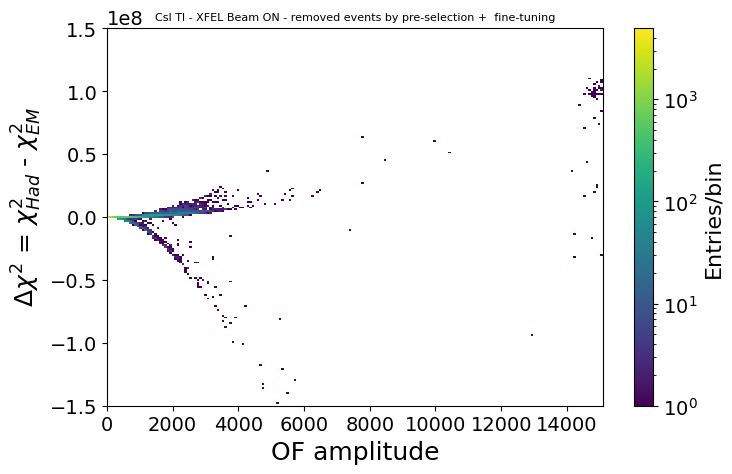

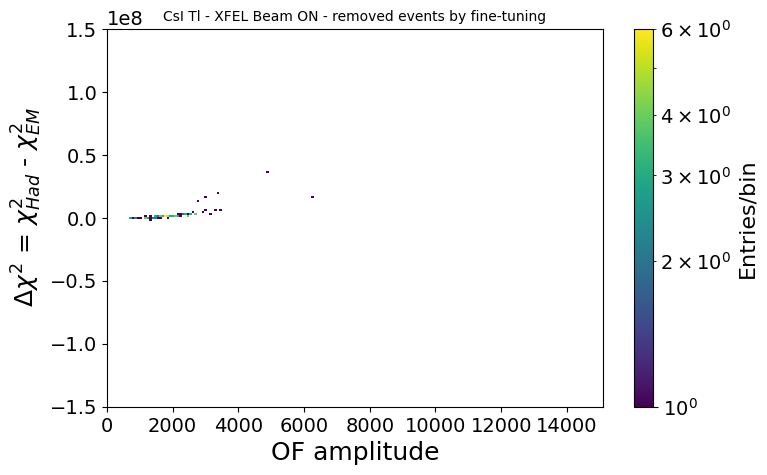

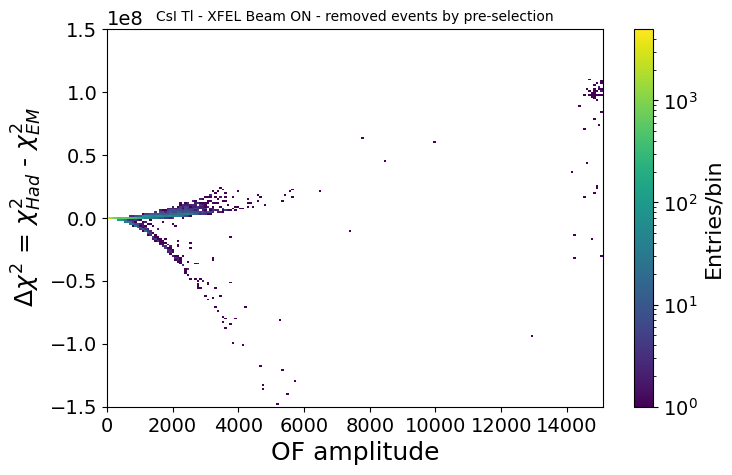

peak memory: 525.22 MiB, increment: 12.85 MiB


In [6]:
%%memit

plt.figure(figsize=(8, 5))
plt.hist2d(Tl.amp_EM_PS_FT , Tl.deltachi2_PS_FT ,bins=(np.linspace(0,15100,200),np.linspace(-0.15e9, 0.15e9, 200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$ ',fontsize=18)
plt.grid(alpha=0.3)
plt.title('CsI Tl - XFEL Beam ON with pre-selection + fine-tuning',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()
plt.figure(figsize=(8, 5))
plt.hist2d(Tl.amp_EM_PS , Tl.deltachi2_PS ,bins=(np.linspace(0,15100,200),np.linspace(-0.15e9, 0.15e9, 200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$ ',fontsize=18)
plt.grid(alpha=0.3)
plt.title('CsI Tl - XFEL Beam ON with pre-selection ',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist2d(Tl.amp_EM_PS_FT_removed , Tl.deltachi2_PS_FT_removed ,bins=(np.linspace(0,15100,200),np.linspace(-0.15e9, 0.15e9, 200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize=18)
# plt.grid(alpha=0.3)
plt.title('CsI Tl - XFEL Beam ON - removed events by pre-selection +  fine-tuning',fontsize=8)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()
plt.figure(figsize=(8, 5))
plt.hist2d(Tl.amp_EM_FT_removed , Tl.deltachi2_FT_removed ,bins=(np.linspace(0,15100,200),np.linspace(-0.15e9, 0.15e9, 200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize=18)
# plt.grid(alpha=0.3)
plt.title('CsI Tl - XFEL Beam ON - removed events by fine-tuning',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist2d(Tl.amp_EM_PS_removed , Tl.deltachi2_PS_removed ,bins=(np.linspace(0,15100,200),np.linspace(-0.15e9, 0.15e9, 200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize=18)
# plt.grid(alpha=0.3)
plt.title('CsI Tl - XFEL Beam ON - removed events by pre-selection',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()

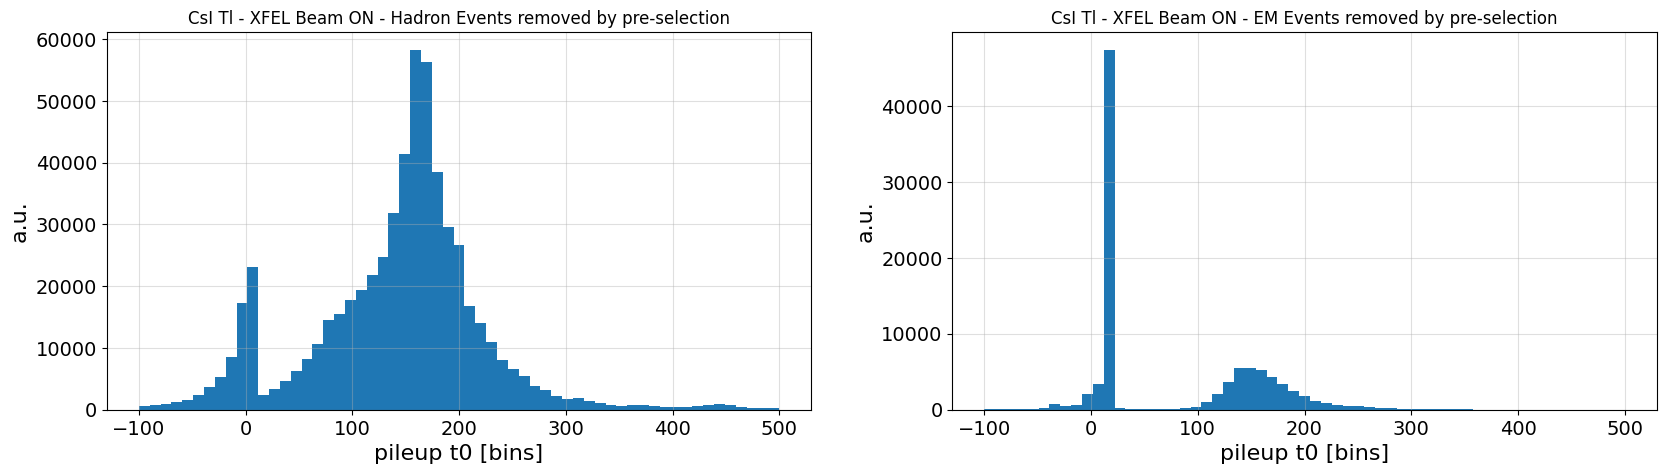

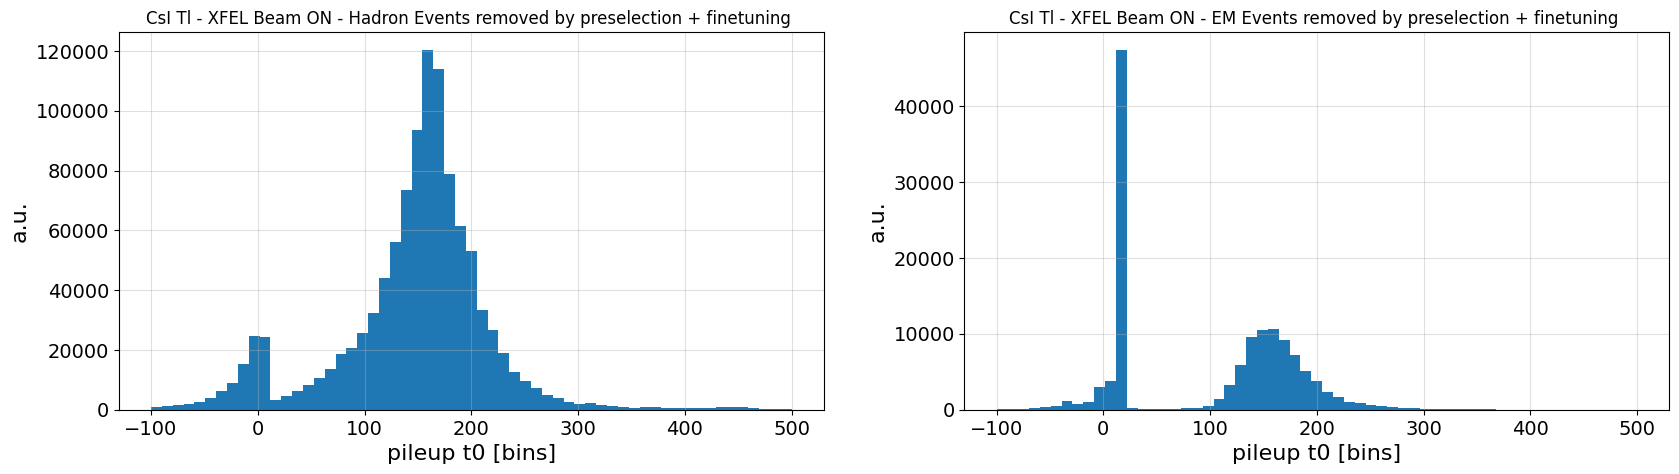

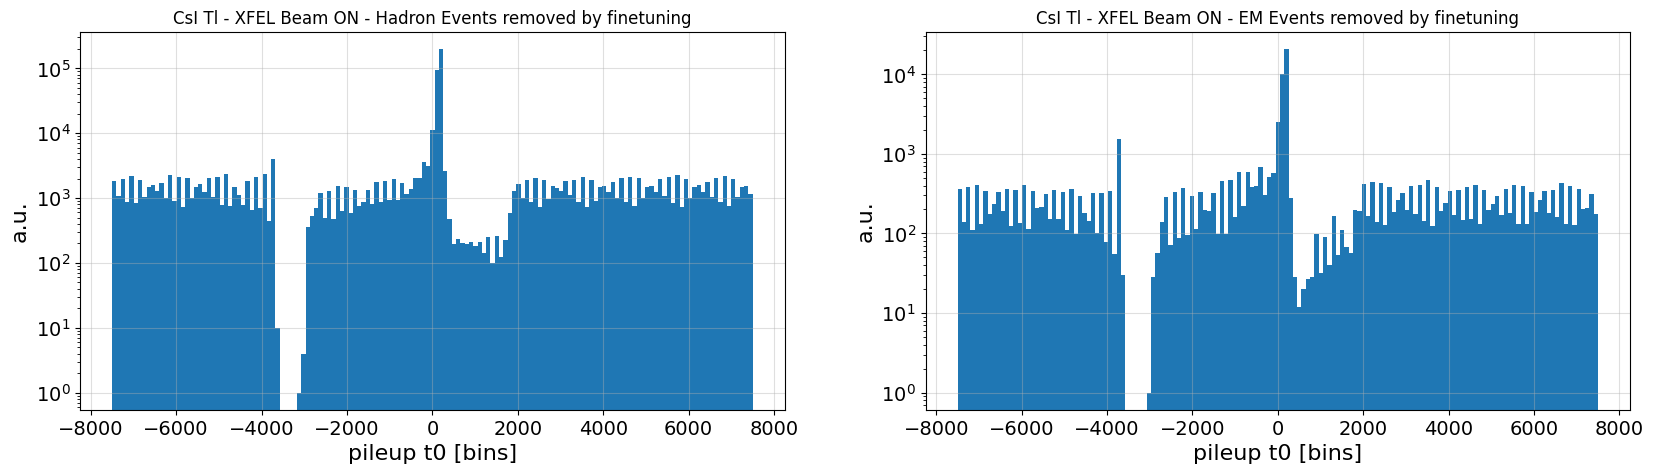

In [7]:
# ln = [i for i, x in enumerate(Tl.deltachi2) if x>0]
# lp = [i for i, x in enumerate(Tl.deltachi2) if x<0]
# plt.figure(figsize=(20, 12))
# plt.subplot(2,2,1)
# plt.hist(np.take(Tl.t0pil_Had*fs, ln), bins =np.linspace(-100,500,60))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# plt.grid(alpha = 0.4)
# plt.title('CsI Tl - XFEL Beam ON - all events, Hadron Events', fontsize = 12)
# plt.subplot(2,2,2)
# plt.hist(np.take(Tl.t0pil_EM*fs,lp), bins =np.linspace(-100,500,60))
# # plt.yscale('log')
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# plt.grid(alpha = 0.4)
# plt.title('CsI Tl - XFEL Beam ON - all events, EM Events', fontsize = 12)
# plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_all.png',bbox_inches = 'tight')
# plt.show()
ln = [i for i, x in enumerate(Tl.deltachi2_PS_removed) if x>0]
lp = [i for i, x in enumerate(Tl.deltachi2_PS_removed) if x<0]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.hist(np.take(Tl.t0pil_Had_PS_removed*fs, ln), bins =np.linspace(-100,500,60))
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - Hadron Events removed by pre-selection', fontsize = 12)
plt.subplot(2,2,2)
plt.hist(np.take(Tl.t0pil_EM_PS_removed*fs,lp), bins =np.linspace(-100,500,60))
# plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - EM Events removed by pre-selection', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_PS_removed.png',bbox_inches = 'tight')
plt.show()


ln = [i for i, x in enumerate(Tl.deltachi2_PS_FT_removed) if x>0]
lp = [i for i, x in enumerate(Tl.deltachi2_PS_FT_removed) if x<0]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.hist(np.take(Tl.t0pil_Had_PS_FT_removed*fs, ln), bins =np.linspace(-100,500,60))
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - Hadron Events removed by preselection + finetuning ', fontsize = 12)
plt.subplot(2,2,2)
plt.hist(np.take(Tl.t0pil_EM_PS_FT_removed*fs,lp), bins =np.linspace(-100,500,60))
# plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - EM Events removed by preselection + finetuning ', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_PS_FT_removed.png',bbox_inches = 'tight')
plt.show()
ln = [i for i, x in enumerate(Tl.deltachi2_FT_removed) if x>0]
lp = [i for i, x in enumerate(Tl.deltachi2_FT_removed) if x<0]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.hist(np.take(Tl.t0pil_Had_FT_removed*fs, ln), bins =np.linspace(-7500,7500,150))
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.yscale('log')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - Hadron Events removed by finetuning', fontsize = 12)
plt.subplot(2,2,2)
plt.hist(np.take(Tl.t0pil_EM_FT_removed*fs,lp), bins =np.linspace(-7500,7500,150))
# plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.yscale('log')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - EM Events removed by finetuning', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_FT_removed_log.png',bbox_inches = 'tight')
plt.show()

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


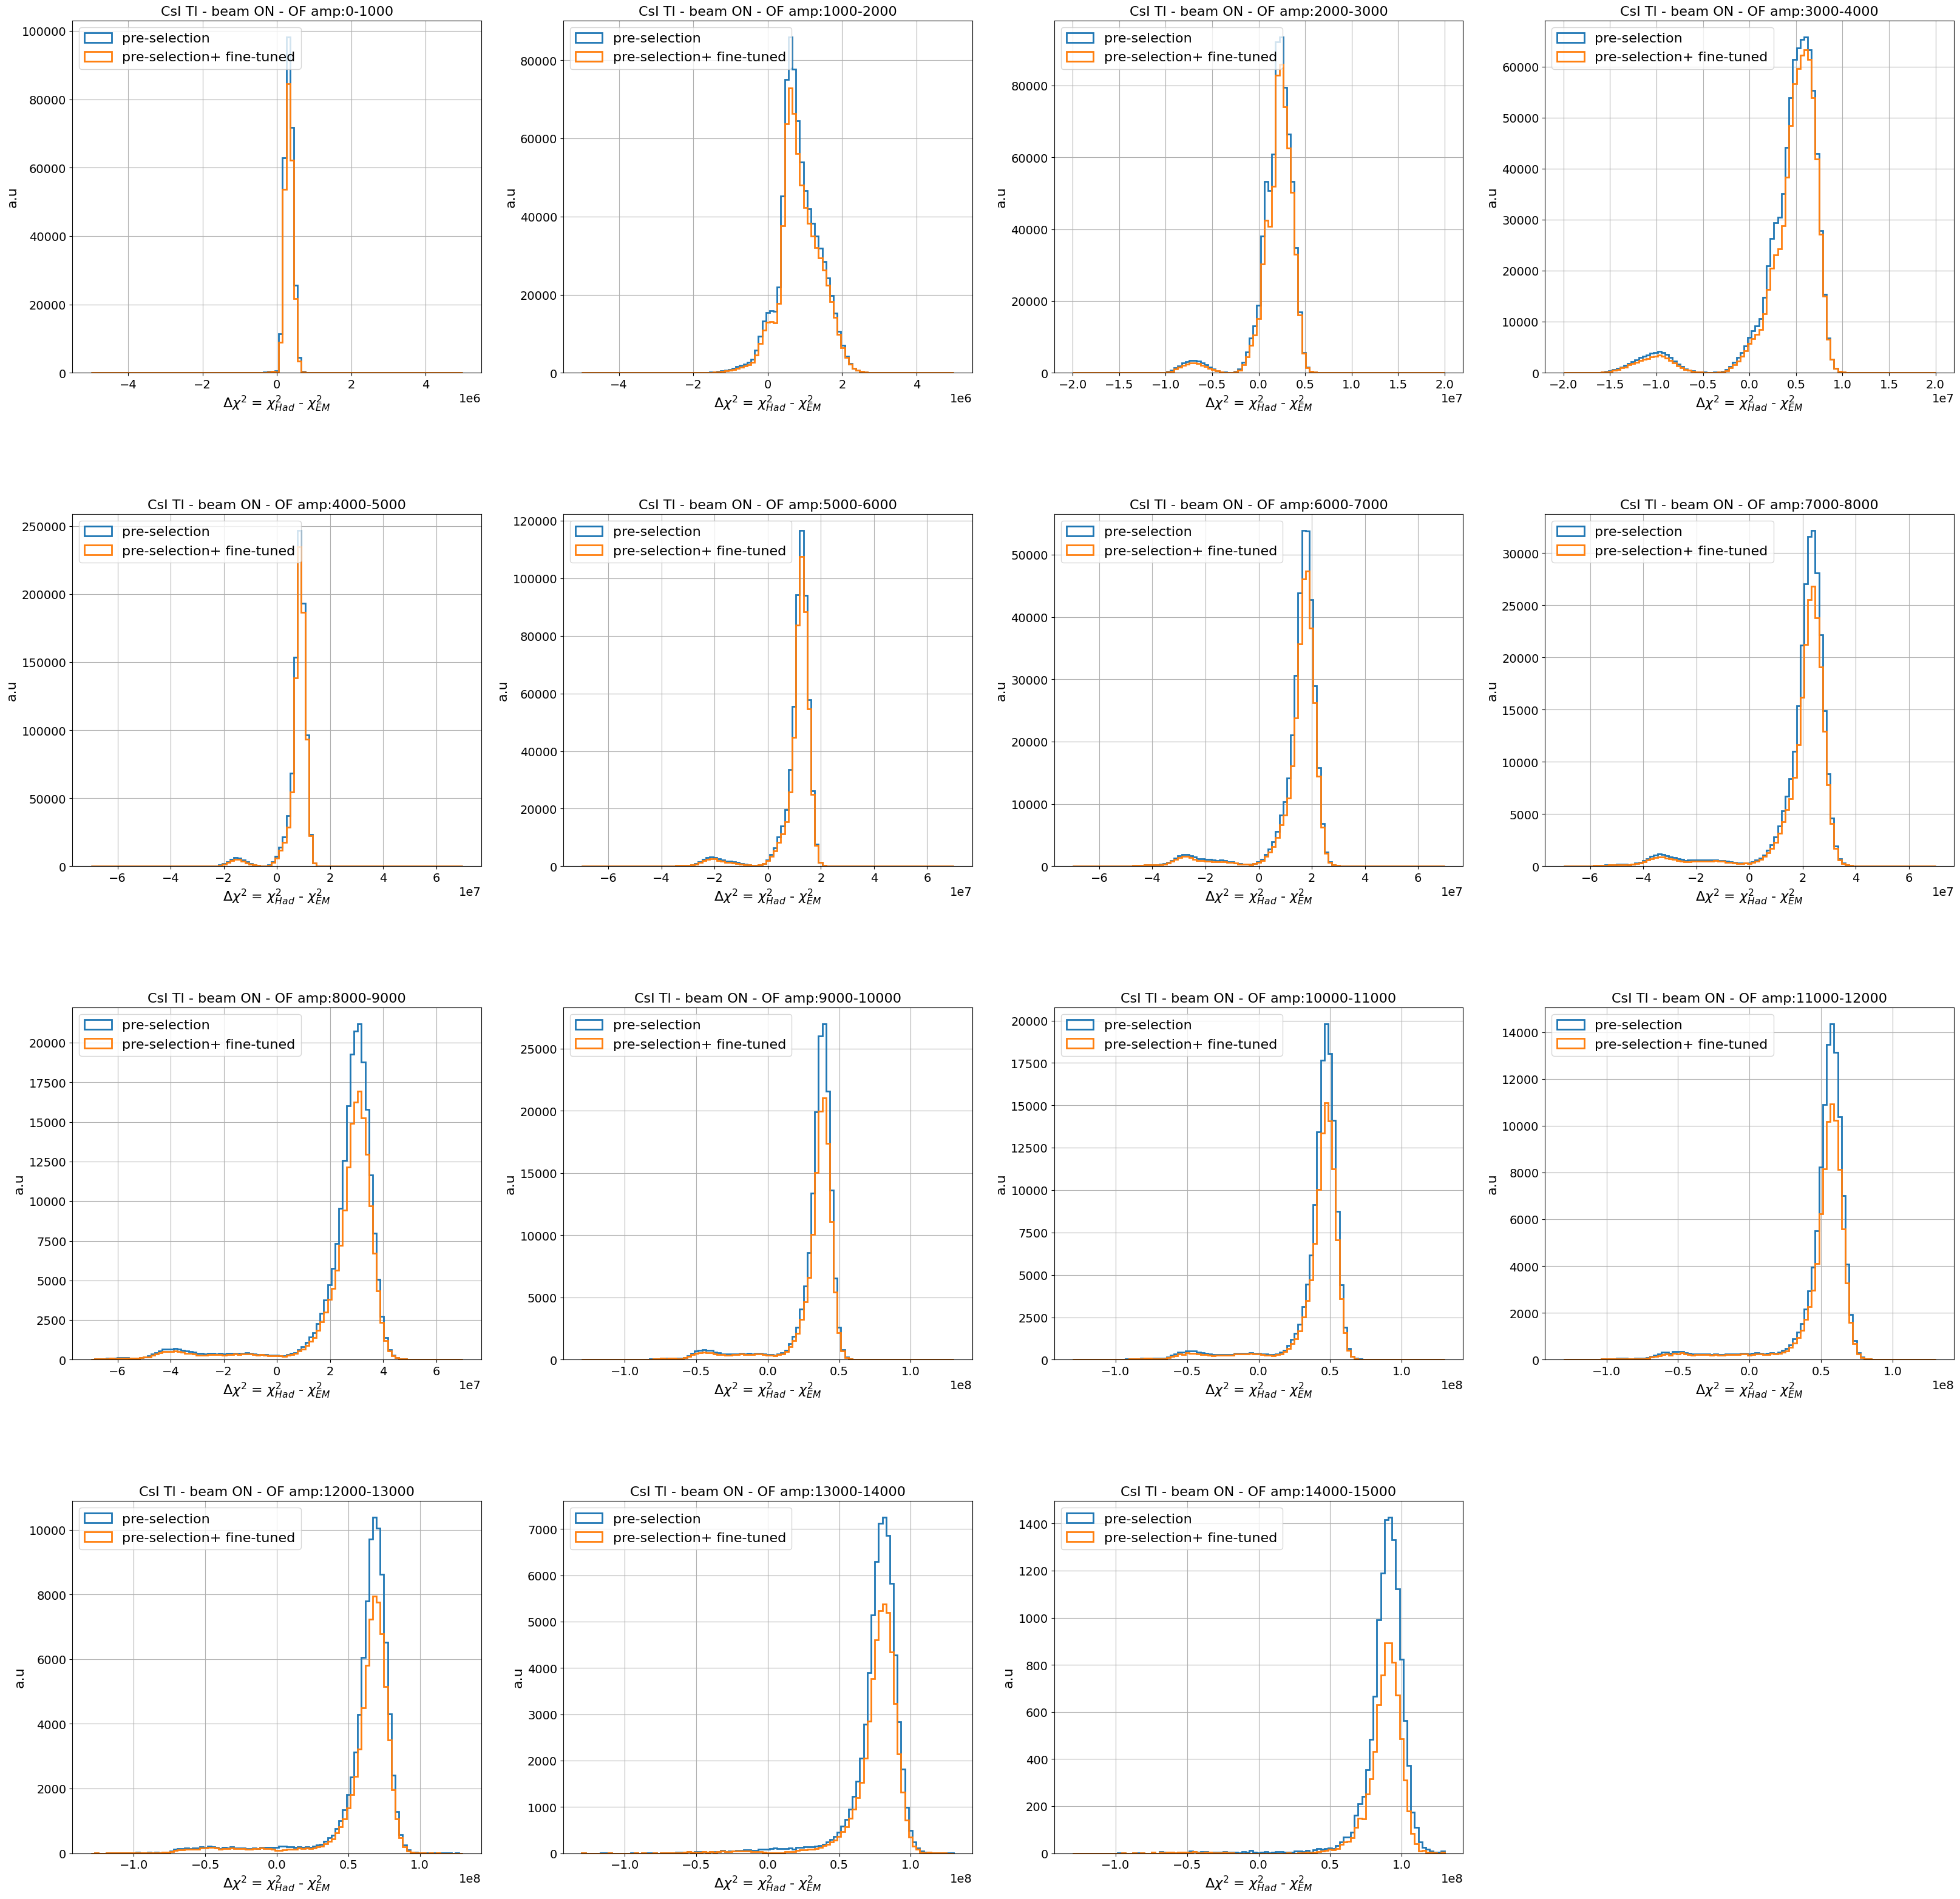

In [59]:



slices=np.arange(0,15000,1000)
fig, ax = plt.subplots(4, 4, figsize=(40,40))
ax = ax.flatten()
ax[-1].axis('off')#; ax[-2].axis('off')
for i, s in enumerate(slices):
    sl = [i for i, x in enumerate(Tl.amp_EM_PS) if x>s and x<s+1000]
    bins = np.linspace(-1e8,1e8,100)
    if s  < 2000: bins = np.linspace(-0.05e8,0.05e8,100)
    elif s  < 4000: bins = np.linspace(-0.2e8,0.2e8,100)
    elif s  < 9000: bins = np.linspace(-0.7e8,0.7e8,100)
    else: bins = np.linspace(-1.3e8,1.3e8,100)
    weights = np.ones_like(np.take(Tl.deltachi2_PS,sl))/len(np.take(Tl.deltachi2_PS,sl))
    ax[i].hist(np.take(Tl.deltachi2_PS,sl), bins =bins,  histtype = 'step', linewidth = 2, label = 'pre-selection')
    sl = [i for i, x in enumerate(Tl.amp_EM_PS_FT) if x>s and x<s+1000]
    weights = np.ones_like(np.take(Tl.deltachi2_PS_FT,sl))/len(np.take(Tl.deltachi2_PS_FT,sl))
    ax[i].hist(np.take(Tl.deltachi2_PS_FT,sl), bins =bins,  histtype = 'step', linewidth = 2, label = 'pre-selection+ fine-tuned')
    ax[i].set_title('CsI Tl - beam ON - OF amp:'+str(s)+'-'+str(s+1000))
    ax[i].set_xlabel(r'$\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$')
    ax[i].set_ylabel('a.u')
    ax[i].grid()
    ax[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[i].legend(loc = 'upper left')
plt.show()


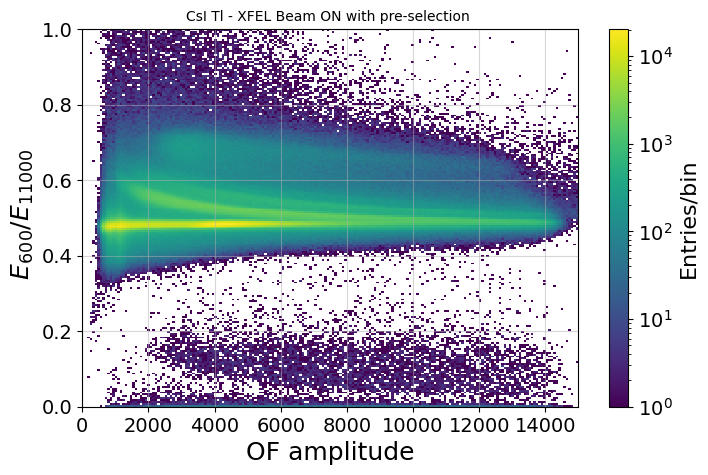

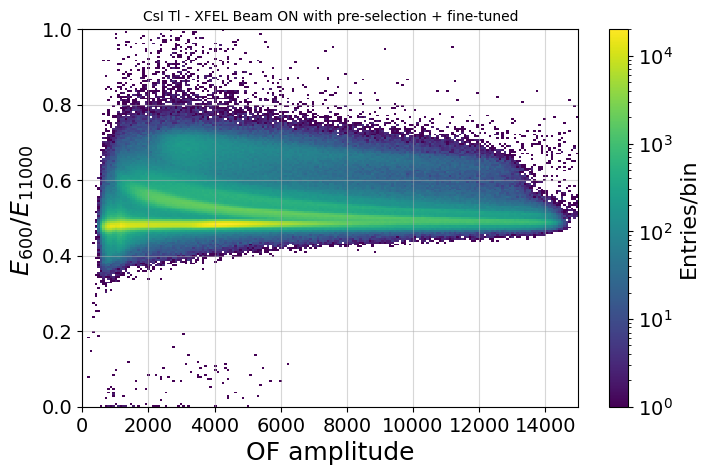

peak memory: 4307.07 MiB, increment: 0.00 MiB


In [57]:
%%memit
plt.figure(figsize=(8, 5))
plt.hist2d(Tl.amp_EM_PS , Tl.CR_PS ,bins=(np.linspace(0,15000,200), np.linspace(0,1,200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r' $E_{600}/E_{11000}$',fontsize=18)
plt.grid(alpha=0.5)
plt.title('CsI Tl - XFEL Beam ON with pre-selection ',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist2d(Tl.amp_EM_PS_FT , Tl.CR_PS_FT ,bins=(np.linspace(0,15000,200), np.linspace(0,1,200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r'  $E_{600}/E_{11000}$',fontsize=18)
plt.grid(alpha=0.5)
plt.title('CsI Tl - XFEL Beam ON with pre-selection + fine-tuned',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()


In [ ]:
l , m = [], []
for n in range (len (Tl.amp_EM_PS_FT_removed)):
    if Tl.amp_EM_PS_FT_removed[n]>13900 and Tl.amp_EM_PS_FT_removed[n]<14000:
        l.append(n)
        
for i in l:        
    if Tl.deltachi2_PS_FT_removed[i]>-0.1e8 and Tl.deltachi2_PS_FT_removed[i]<-0.01e8:
        m.append(i)
print(len(l), len(m))

In [ ]:
ln = [i for i, x in enumerate(Tl.deltachi2) if x>0]
lp = [i for i, x in enumerate(Tl.deltachi2) if x<0]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.hist(np.take(Tl.t0pil_Had*fs, ln), bins =np.linspace(-200,500,100))
plt.xlabel('pileup t0 [bins]')
plt.title('CsI Tl - XFEL Beam ON - all events, Hadron Events', fontsize = 12)
plt.subplot(2,2,2)
plt.hist(np.take(Tl.t0pil_EM*fs,lp), bins =np.linspace(-200,500,100))
# plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.title('CsI Tl - XFEL Beam ON - all events, EM Events', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_all.png',bbox_inches = 'tight')
plt.show()
ln = [i for i, x in enumerate(Tl.deltachi2_PS) if x>0]
lp = [i for i, x in enumerate(Tl.deltachi2_PS) if x<0]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.hist(np.take(Tl.t0pil_Had_PS*fs, ln), bins =np.linspace(-200,500,100))
plt.xlabel('pileup t0 [bins]')
plt.title('CsI Tl - XFEL Beam ON - after pre-selection, Hadron Events', fontsize = 12)
plt.subplot(2,2,2)
plt.hist(np.take(Tl.t0pil_EM_PS*fs,lp), bins =np.linspace(-200,500,100))
# plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.title('CsI Tl - XFEL Beam ON - after pre-selection, EM Events', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_PS.png',bbox_inches = 'tight')
plt.show()
ln = [i for i, x in enumerate(Tl.deltachi2_PS_FT) if x>0]
lp = [i for i, x in enumerate(Tl.deltachi2_PS_FT) if x<0]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.hist(np.take(Tl.t0pil_Had_PS_FT*fs, ln), bins =np.linspace(-200,500,100))
plt.xlabel('pileup t0 [bins]')
plt.title('CsI Tl - XFEL Beam ON - after preselection + finetuning, Hadron Events', fontsize = 12)
plt.subplot(2,2,2)
plt.hist(np.take(Tl.t0pil_EM_PS_FT*fs,lp), bins =np.linspace(-200,500,100))
# plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.title('CsI Tl - XFEL Beam ON - after preselection + finetuning, EM Events', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_PS_FT.png',bbox_inches = 'tight')
plt.show()

In [ ]:
%%memit
j = random.sample(m, 5)
tem_arr = []
for n in range(len(j)):    
    wavenum = Tl.waveform_number_PS_FT_removed[j][n]-1
    print(Tl.t0pil_Had_PS_FT_removed[j][n]*fs,  Tl.amppil_Had_PS_FT_removed[j][n],   Tl.chi2pil_Had_PS_FT_removed[j][n]/1e7)
    print(Tl.t0pil_EM_PS_FT_removed[j][n]*fs,  Tl.amppil_EM_PS_FT_removed[j][n],   Tl.chi2pil_EM_PS_FT_removed[j][n]/1e7)

    print(Tl.rundata_PS_FT_removed[j][n].decode('utf-8'),  Tl.chi2_Had_PS_FT_removed[j][n]/15000)
    if Tl.rundata_PS_FT_removed[j][n].decode('utf-8')[12:17] == 'XFEL0': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT_removed[j][n].decode('utf-8')[12:18]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT_removed[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    else: 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT_removed[j][n].decode('utf-8')[12:23]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT_removed[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)

    trace_3 = chunks.get_chunk(15000).values.reshape( 15000, 1)
    trace_3 = trace_3.T-np.expand_dims(trace_3[100:1000,:].mean(axis=0), axis=0).T
    print (np.sum(trace_3/np.min(trace_3, axis =1), axis =1))
    print (integrate.trapz(y = trace_3, dx = 1)/np.min(trace_3, axis =1))
    print(trace_3.shape, min(trace_3[0]))
    plt.scatter(np.arange(15000), trace_3[0], label='Signal %s'%m[n], color='blue', marker = '.' , alpha=0.5, s =2)
    plt.plot(np.arange(15000), Tl.amp_Had_PS_FT_removed[j][n]*np.roll(TemplateHAD_Tl, round(Tl.t0_Had_PS_FT_removed[j][n]*(1/2e-9)))+Tl.amppil_Had_PS_FT_removed[j][n]*np.roll(TemplateHAD_Tl, round(Tl.t0pil_Had_PS_FT_removed[j][n]*(1/2e-9))),  
            label='Hadron fit ', color='red',linewidth ='1.5')#, linestyle='dotted')
    plt.plot(np.arange(15000), Tl.amp_EM_PS_FT_removed[j][n]*np.roll(TemplateEM_Tl, round(Tl.t0_EM_PS_FT_removed[j][n]*(1/2e-9)))+Tl.amppil_EM_PS_FT_removed[j][n]*np.roll(TemplateEM_Tl, round(Tl.t0pil_EM_PS_FT_removed[j][n]*(1/2e-9))),  
            label='EM fit ', color='green',linewidth ='1.5')#, linestyle='dotted')
    plt.ylabel(r'Light output [ADC]',fontsize = 16)
    plt.xlabel(r'Time [$\mu$s]',fontsize = 16)
    plt.title('CsI Tl - XFEL Beam ON',fontsize = 16)
    plt.tick_params(which='both', direction='in', right=True, top=True)
    plt.legend(loc = 'lower right', fontsize =16)
#     plt.xlim(3000,5000)
    plt.grid(linestyle='dotted')
    plt.minorticks_on()
    plt.show()



In [ ]:
lp = [Tl.chi2_EM_PS_FT[i]/Tl.chi2pil_EM_PS_FT[i] for i in range(len(Tl.deltachi2_PS_FT)) if Tl.deltachi2_PS_FT[i]>0]
ln = [Tl.chi2_Had_PS_FT[i]/Tl.chi2pil_Had_PS_FT[i] for i in range(len(Tl.deltachi2_PS_FT)) if Tl.deltachi2_PS_FT[i]<0]

In [ ]:
plt.hist(lp, bins =np.linspace(0.8,1.25, 100))
plt.show()
plt.hist(ln, bins =np.linspace(0.8,1.5, 100))
plt.show()

In [50]:
l , m = [], []
for n in range (len (Tl.amp_EM_PS_FT)):
    if Tl.amp_EM_PS_FT[n]>500 and Tl.amp_EM_PS_FT[n]<15000:
        l.append(n)
        
# for i in l:        
#     if Tl.t0pil_Had_PS_FT[i]<0  and abs(Tl.amppil_Had_PS_FT[i]) < 40 and Tl.deltachi2_PS_FT[i]<-0.01e8 :
#         m.append(i)
# print(len(l), len(m))
for i in l:        
    if Tl.t0pil_EM_PS_FT[i]<0  and abs(Tl.amppil_EM_PS_FT[i]) >1000 and Tl.deltachi2_PS_FT[i]>0.01e8 :
        m.append(i)
print(len(l), len(m))

# for i in l:        
#     if Tl.chi2_Had_PS_FT[i]/15000>2000  and Tl.deltachi2_PS_FT[i]<0:
#         m.append(i)
# print(len(l), len(m))

# for i in l:        
#     if Tl.chi2_EM_PS_FT[i]/Tl.chi2pil_EM_PS_FT[i]>1.2 and Tl.deltachi2_PS_FT[i]>0:
#         m.append(i)
# print(len(l), len(m))      
# for i in l:        
#     if Tl.chi2pil_EM_PS_FT[i]/1e7>5 and  Tl.chi2pil_EM_PS_FT[i]/1e7<6and Tl.deltachi2_PS_FT[i]>0:
#         m.append(i)
# print(len(l), len(m))

5142867 3431


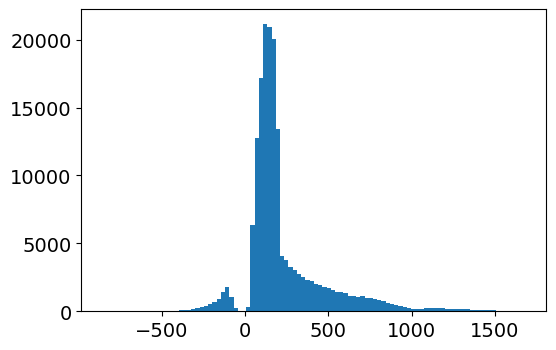

In [49]:
plt.hist(np.take(Tl.amppil_EM_PS_FT, m), bins = 100)
# plt.xlim(0,50)
plt.show()

Had -18.0 1541.6639850971721 3.1149915247302045
EM -18.0 1526.9011500721792 1.7211278753694066
ratio 2.5092168692667767
wavedump_Tl_XFEL06_21-07-26_05-25-58 3690.021825948294


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL03/wavedump_Tl_XFEL03_21-07-15_14-57-41.txt' mode='r' encoding='utf-8'>


[470.55790072]
[470.51716006]
(1, 15000) -8158.898888888889


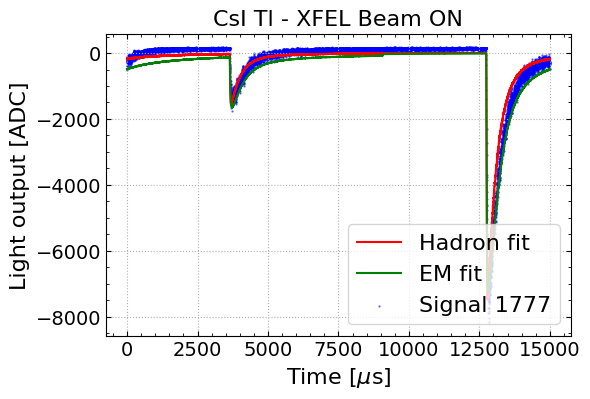

Had -24.0 1310.9110454749778 4.5077802253829855
EM -23.0 1286.5027580733406 1.9650677955699376
ratio 1.9383975168079388
wavedump_Tl_XFEL07_21-07-28_10-45-12 4171.723754044127
[847.82655504]
[847.80942151]
(1, 15000) -7926.305555555555


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_Tl_XFEL06_21-07-26_05-25-58.txt' mode='r' encoding='utf-8'>


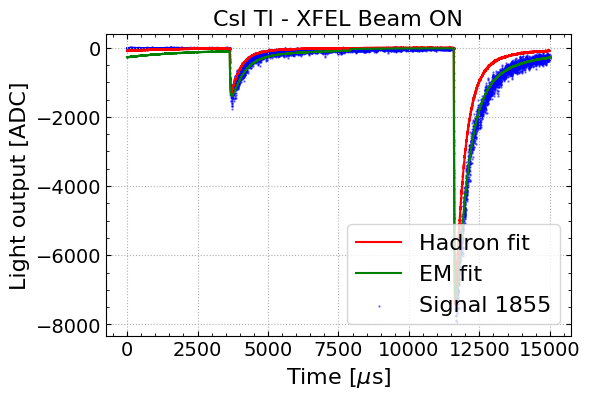

Had -39.0 1242.0256614939972 5.60059380165421
EM -40.0 1254.517810345748 2.2173809615147655
ratio 1.7907811225248063
wavedump_Tl_XFEL06_21-07-27_00-07-06 4780.889545034233
[853.83334796]
[853.82915826]
(1, 15000) -9839.223333333333


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_Tl_XFEL07_21-07-28_10-45-12.txt' mode='r' encoding='utf-8'>


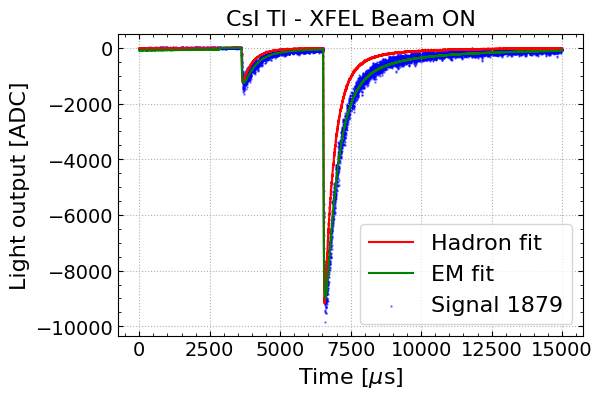

Had -7.0 1229.6350845064233 1.9748473908766762
EM -7.999999999999999 1212.5231450451352 1.234494925461059
ratio 2.32688630140692
wavedump_Tl_XFELtesting_21-07-10_01-26-31 2342.936326668638
[887.46632051]
[887.45909336]
(1, 15000) -5091.295555555556


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_Tl_XFEL06_21-07-27_00-07-06.txt' mode='r' encoding='utf-8'>


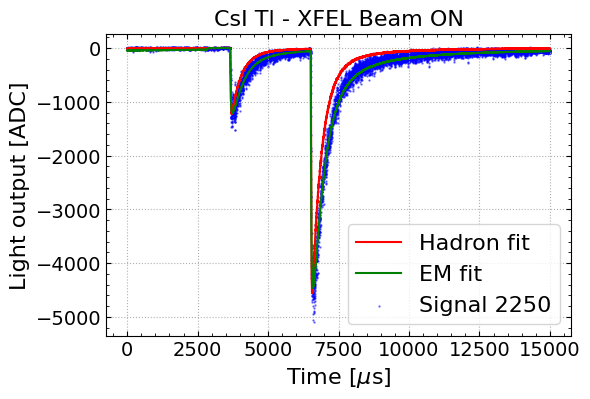

Had -40.0 1229.3527445107043 4.692779380509189
EM -41.0 1212.871659826264 1.916000944809017
ratio 1.8554151207284326
wavedump_Tl_XFEL06_21-07-26_17-33-11 4154.419704445911
[768.79099235]
[768.76727744]
(1, 15000) -8431.451111111111


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFELtesting/wavedump_Tl_XFELtesting_21-07-10_01-26-31.txt' mode='r' encoding='utf-8'>


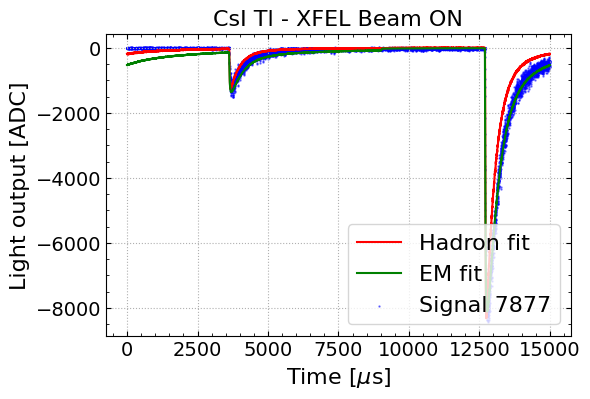

Had -36.0 1141.3784155958506 1.3321194389440696
EM -35.0 1182.0726243756537 0.9292991556534532
ratio 2.6752349369938515
wavedump_Tl_XFEL07_21-07-30_11-29-15 1772.4035210721493


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_Tl_XFEL06_21-07-26_17-33-11.txt' mode='r' encoding='utf-8'>


[796.37319667]
[796.37164591]
(1, 15000) -3647.656666666666


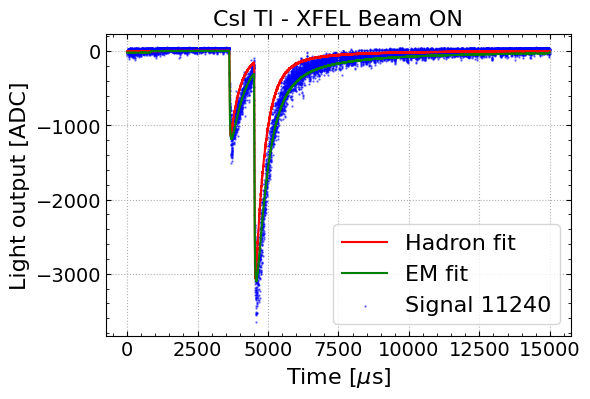

Had -85.0 1076.3842171779436 2.4103796067545593
EM -85.0 1061.939001354743 1.530441345835336
ratio 1.820966427490412
wavedump_Tl_XFEL06_21-07-27_03-24-04 2393.397942326188
[722.37380541]
[722.36421685]
(1, 15000) -7332.81111111111


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_Tl_XFEL07_21-07-30_11-29-15.txt' mode='r' encoding='utf-8'>


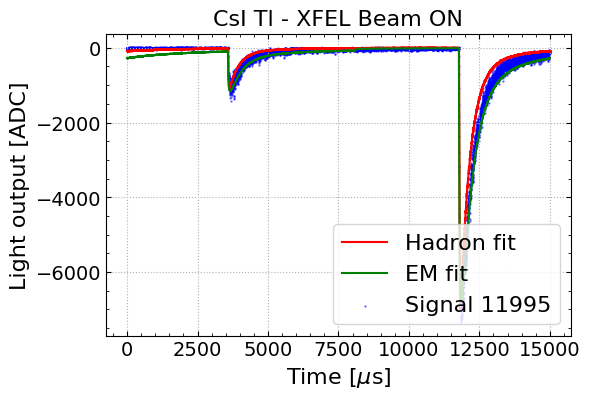

Had -7.999999999999999 1690.2077020990066 2.882965894854296
EM -7.999999999999999 1613.7242364014116 1.5457847404089957
ratio 2.876949433657516
wavedump_Tl_XFEL05_21-07-20_10-31-59 3861.2201276918254
[802.19565008]
[802.15351582]
(1, 15000) -5954.905555555555


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_Tl_XFEL06_21-07-27_03-24-04.txt' mode='r' encoding='utf-8'>


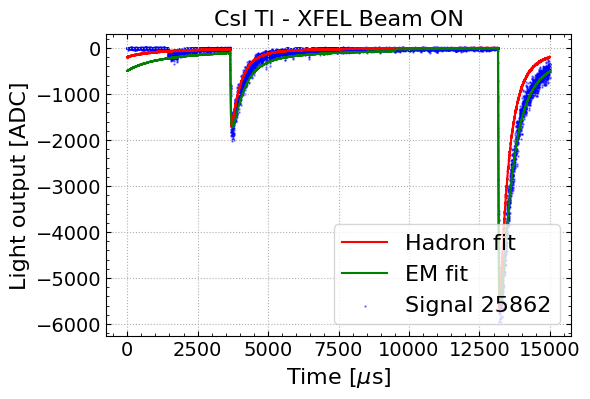

Had -15.999999999999998 1321.6535713138778 1.7146591434917853
EM -15.999999999999998 1381.2687915017189 1.2603517308510355
ratio 2.686582468584151
wavedump_Tl_XFEL07_21-07-29_20-35-22 2328.840215394229
[830.96512719]
[830.96294589]
(1, 15000) -5359.1900000000005


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL05/wavedump_Tl_XFEL05_21-07-20_10-31-59.txt' mode='r' encoding='utf-8'>


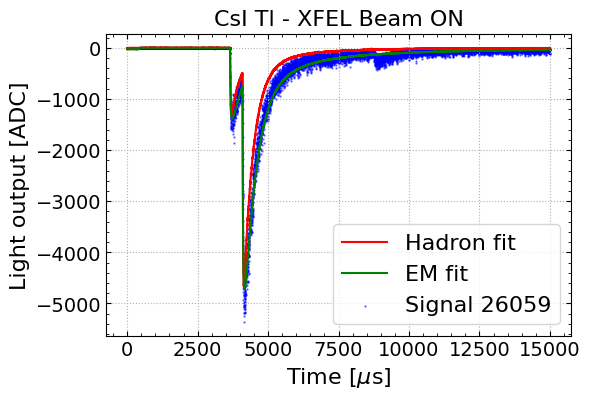

Had -60.0 1099.9129463884378 1.3611657907965145
EM -60.0 1094.251758630958 1.0687475471317978
ratio 2.2482521434443594
wavedump_Tl_XFEL05_21-07-21_00-55-34 1728.6811805383345
[849.2796244]
[849.26757933]
(1, 15000) -4231.974444444444


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_Tl_XFEL07_21-07-29_20-35-22.txt' mode='r' encoding='utf-8'>


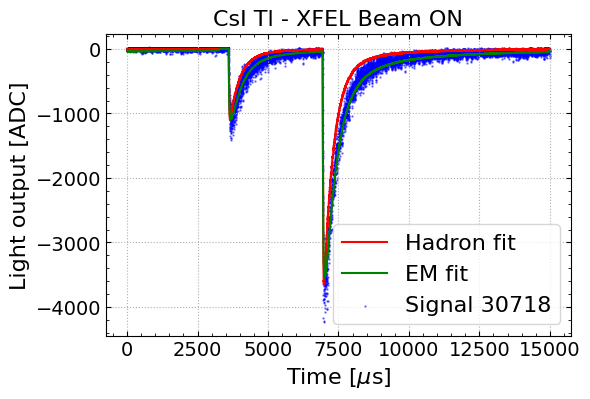

peak memory: 4135.55 MiB, increment: 0.79 MiB


In [51]:
%%memit
j = random.sample(m, 10)
tem_arr = []
for n in range(len(j)):    
    wavenum = Tl.waveform_number_PS_FT[j][n]-1
    print('Had', Tl.t0pil_Had_PS_FT[j][n]*fs,  Tl.amppil_Had_PS_FT[j][n],   Tl.chi2pil_Had_PS_FT[j][n]/1e7)
    print('EM', Tl.t0pil_EM_PS_FT[j][n]*fs,  Tl.amppil_EM_PS_FT[j][n],   Tl.chi2pil_EM_PS_FT[j][n]/1e7)
    print('ratio', Tl.chi2_EM_PS_FT[j][n]/Tl.chi2pil_EM_PS_FT[j][n])
    print(Tl.rundata_PS_FT[j][n].decode('utf-8'),  Tl.chi2_Had_PS_FT[j][n]/15000)
    if Tl.rundata_PS_FT[j][n].decode('utf-8')[12:17] == 'XFEL0': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT[j][n].decode('utf-8')[12:18]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    else: 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT[j][n].decode('utf-8')[12:23]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)

    trace_3 = chunks.get_chunk(15000).values.reshape( 15000, 1)
    trace_3 = trace_3.T-np.expand_dims(trace_3[100:1000,:].mean(axis=0), axis=0).T
    print (np.sum(trace_3/np.min(trace_3, axis =1), axis =1))
    print (integrate.trapz(y = trace_3, dx = 1)/np.min(trace_3, axis =1))
    print(trace_3.shape, min(trace_3[0]))
    plt.scatter(np.arange(15000), trace_3[0], label='Signal %s'%m[n], color='blue', marker = '.' , alpha=0.5, s =2)
    plt.plot(np.arange(15000), Tl.amp_Had_PS_FT[j][n]*np.roll(TemplateHAD_Tl, round(Tl.t0_Had_PS_FT[j][n]*(1/2e-9)))+Tl.amppil_Had_PS_FT[j][n]*np.roll(TemplateHAD_Tl, round(Tl.t0pil_Had_PS_FT[j][n]*(1/2e-9))),  
            label='Hadron fit ', color='red',linewidth ='1.5')#, linestyle='dotted')
    plt.plot(np.arange(15000), Tl.amp_EM_PS_FT[j][n]*np.roll(TemplateEM_Tl, round(Tl.t0_EM_PS_FT[j][n]*(1/2e-9)))+Tl.amppil_EM_PS_FT[j][n]*np.roll(TemplateEM_Tl, round(Tl.t0pil_EM_PS_FT[j][n]*(1/2e-9))),  
            label='EM fit ', color='green',linewidth ='1.5')#, linestyle='dotted')
    plt.ylabel(r'Light output [ADC]',fontsize = 16)
    plt.xlabel(r'Time [$\mu$s]',fontsize = 16)
    plt.title('CsI Tl - XFEL Beam ON',fontsize = 16)
    plt.tick_params(which='both', direction='in', right=True, top=True)
    plt.legend(loc = 'lower right', fontsize =16)
#     plt.xlim(3000,5000)
    plt.grid(linestyle='dotted')
    plt.minorticks_on()
    plt.show()



### Template

In [10]:
l , m = [], []
for n in range (len (Tl.amp_EM_PS_FT)):
    if Tl.amp_EM_PS_FT[n]>1000 and Tl.amp_EM_PS_FT[n]<1100:
        l.append(n)
        
for i in l:        
    if Tl.deltachi2_PS_FT[i]>0:# and Tl.deltachi2_PS_FT[i]<1e8 :
        m.append(i)
print(len(l), len(m))
       

26803 26789


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/run12/wavedump_Tl_run12_21-04-27_08-48-39.txt' mode='r' encoding='utf-8'>
<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/run12/wavedump_Tl_run12_21-04-29_03-02-04.txt' mode='r' encoding='utf-8'>
<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/run12/wavedump_Tl_run12_21-05-01_09-00-03.txt' mode='r' encoding='utf-8'>
<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/run12/wavedump_Tl_run12_21-05-01_05-59-54.txt' mode='r' encoding='utf-8'>
<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/run12/wavedump_Tl_run12_21-04-27_11-48-49.txt' mode='r' encoding='utf-8'>
<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../

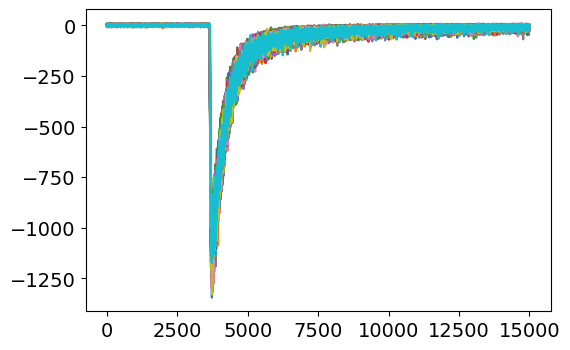

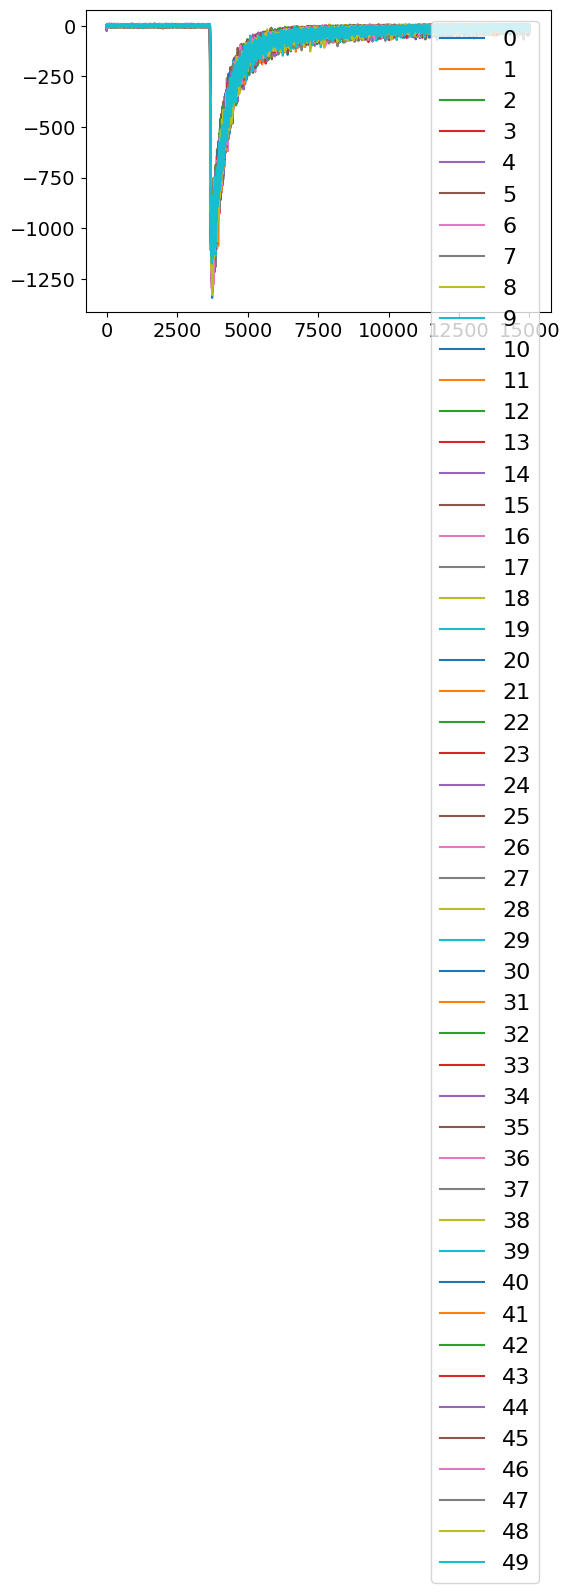

peak memory: 1026.74 MiB, increment: 0.56 MiB


In [11]:
%%memit
m = random.sample(m, 50)
tem_arr = []
for n in range(len(m)):    
    wavenum = Tl.waveform_number_PS_FT[m][n]-1
#     print(Tl.t0pil_Had_PS_FT[m][n]*fs,  Tl.amppil_Had_PS_FT[m][n],   Tl.chi2pil_Had_PS_FT[m][n]/1e7)
#     print(Tl.rundata_PS_FT[m][n].decode('utf-8'))
    if Tl.rundata_PS_FT[m][n].decode('utf-8')[14-2:19-2] == 'XFEL0': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT[m][n].decode('utf-8')[14-2:20-2]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT[m][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    elif Tl.rundata_PS_FT[m][n].decode('utf-8')[14-2:19-2] == 'run12': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT[m][n].decode('utf-8')[14-2:19-2]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT[m][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    else: 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT[m][n].decode('utf-8')[14-2:25-2]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT[m][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)

    trace_3 = chunks.get_chunk(15000).values.reshape( 15000, 1)
    trace_3 = trace_3.T-np.expand_dims(trace_3[100:1000,:].mean(axis=0), axis=0).T

    try: tem_arr = np.append(tem_arr, trace_3, axis = 0)
    except: tem_arr = trace_3
#     print(tem_arr.shape)
amp, t0, chi2 = OF_calct0(signal = tem_arr, 
                    template_norm = TemplateHAD_Tl, 
                    psd_noise =np.load('./saved_outputs/psd_noise_Tl.npy')[1], 
                    fs=1/2e-9,  
                    recordlength=15000)
for i, x in enumerate(tem_arr):
    plt.plot(range(15000), x, label = i)
#     plt.xlim(3600,3800)
plt.show()
for i in range(len(tem_arr)):  
    tem_arr[i] = np.roll(tem_arr[i], int(t0[i]*1/2e-9)*-1)
    
for i, x in enumerate(tem_arr):
    plt.plot(range(15000), x, label = i)
#     plt.xlim(3600,3800)
plt.legend()
plt.show()

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


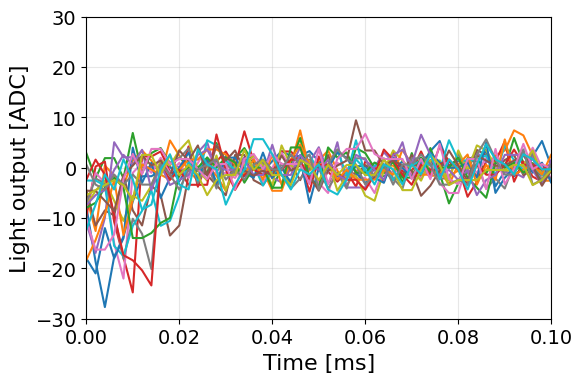

In [33]:
    
for i, x in enumerate(tem_arr):
    plt.plot(np.arange(15000)*2e-3, x, label = i)
plt.xlim(0,0.1)
# plt.legend()
plt.ylabel('Light output [ADC]')
plt.xlabel('Time [ms]')
plt.grid(alpha=0.3)
plt.ylim(-30,30)
plt.show()

In [8]:

# for i, x in enumerate(tem_arr):
#     if min(x)<-6000:
#         print(i)

t = np.delete(tem_arr, [19], axis = 0)
for i, x in enumerate(t):
    plt.plot(range(15000), x, label = i)
plt.legend()
plt.show()

NameError: name 'tem_arr' is not defined

In [13]:
te, Te = create_template(tem_arr)

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-10.0, 10.0)

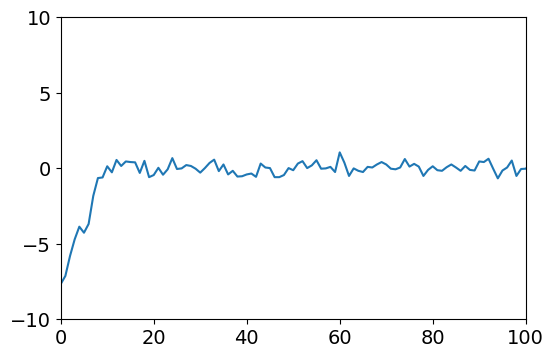

In [15]:
plt.plot(te)
plt.xlim(0,100)
plt.ylim(-10,10)


In [ ]:
t1 = t

In [12]:
np.save('templates/cosmics_Tl_1000_pulses', tem_arr)

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
t1 = t

In [ ]:
te = np.append(t1, t, axis =0)

In [ ]:
te.shape

In [ ]:
te.shape

In [ ]:
te = np.append(t1, t, axis =0)